In [88]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt  
plt.style.use('fivethirtyeight')

fitness = pd.read_csv('apple_health_export_2020-06-10.csv')
fitness['Datetime'] = pd.to_datetime(fitness['startDate'], format='%Y-%m-%d %H:%M:%S %z').dt.normalize()
fitness['Date'] = pd.to_datetime(fitness['Datetime']).dt.tz_localize(None) #TODO
fitness['month_year'] = fitness['Datetime'].dt.to_period('M')
fitness['year'] = fitness['Datetime'].dt.to_period('Y')
fitness = fitness[['type','sourceName','value','unit','meal','Date','month_year','year']]
fitness = fitness[fitness['value'] != 'HKCategoryValueSleepAnalysisInBed']
fitness_rolling_agg = 7


/home/kubuntu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,8,12,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/kubuntu/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [89]:
list = fitness['type'].unique().tolist()
list.pop(-1)
list

['StepCount',
 'DistanceWalkingRunning',
 'BodyMass',
 'FlightsClimbed',
 'DietaryFatMonounsaturated',
 'DietaryEnergyConsumed',
 'DietaryFatPolyunsaturated',
 'DietaryProtein',
 'DietarySugar',
 'DietaryFatSaturated',
 'DietaryVitaminC',
 'DietaryCholesterol',
 'DietaryIron',
 'DietarySodium',
 'DietaryPotassium',
 'DietaryCarbohydrates',
 'DietaryCalcium',
 'DietaryFiber',
 'DietaryFatTotal',
 'HeadphoneAudioExposure']

sum
StepCount Aggregated and Graphed and Appended
sum
DistanceWalkingRunning Aggregated and Graphed and Appended
max
BodyMass Aggregated and Graphed and Appended
sum
FlightsClimbed Aggregated and Graphed and Appended
sum
DietaryFatMonounsaturated Aggregated and Graphed and Appended
sum
DietaryEnergyConsumed Aggregated and Graphed and Appended
sum
DietaryFatPolyunsaturated Aggregated and Graphed and Appended
sum
DietaryProtein Aggregated and Graphed and Appended
sum
DietarySugar Aggregated and Graphed and Appended
sum
DietaryFatSaturated Aggregated and Graphed and Appended
sum
DietaryVitaminC Aggregated and Graphed and Appended
sum
DietaryCholesterol Aggregated and Graphed and Appended
sum
DietaryIron Aggregated and Graphed and Appended
sum
DietarySodium Aggregated and Graphed and Appended
sum
DietaryPotassium Aggregated and Graphed and Appended
sum
DietaryCarbohydrates Aggregated and Graphed and Appended
sum
DietaryCalcium Aggregated and Graphed and Appended
sum
DietaryFiber Aggregated

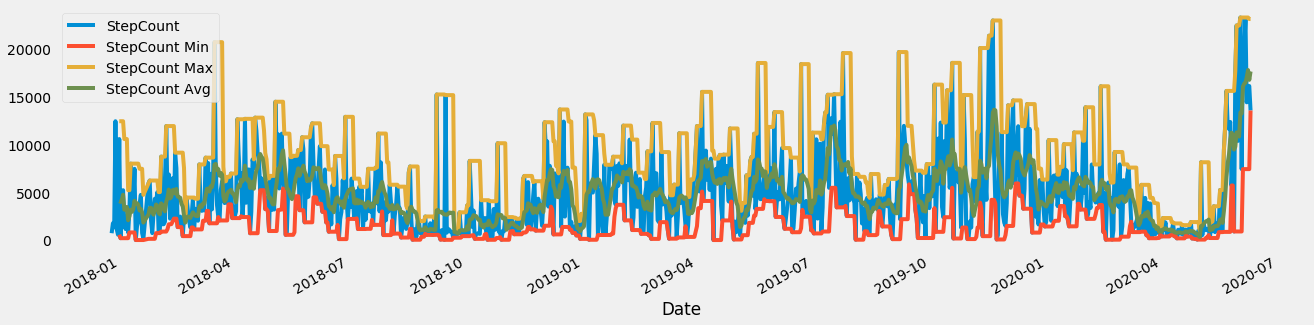

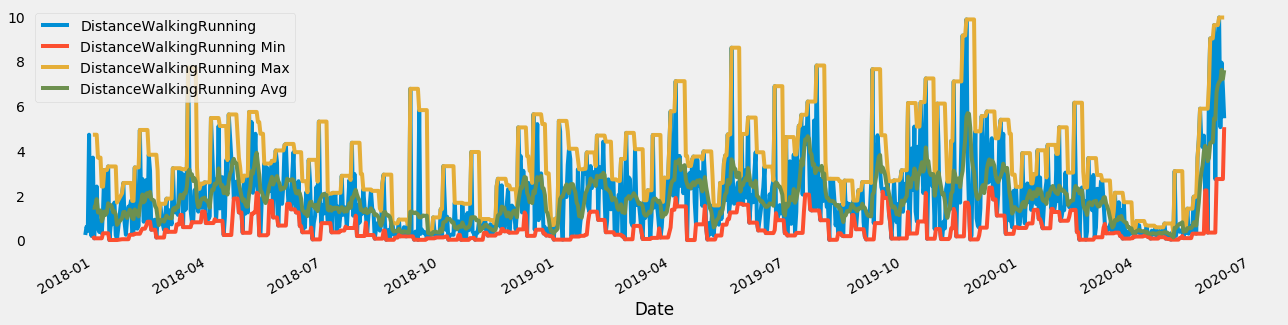

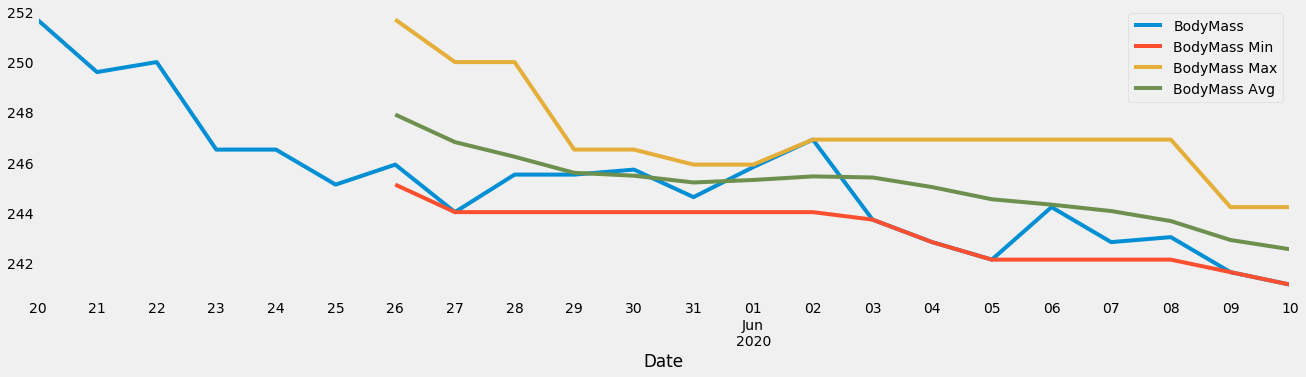

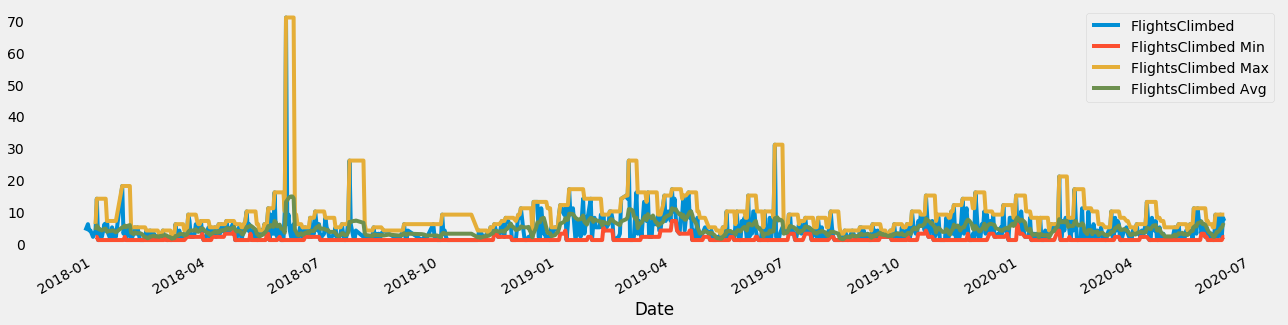

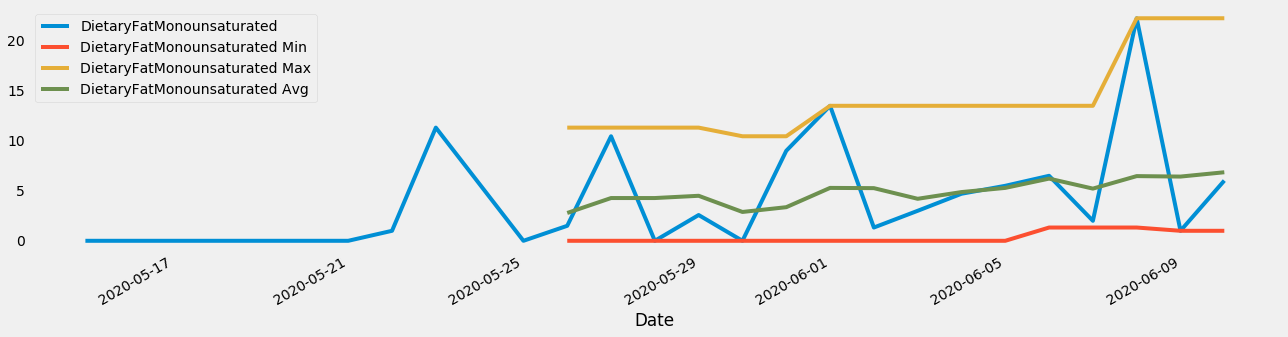

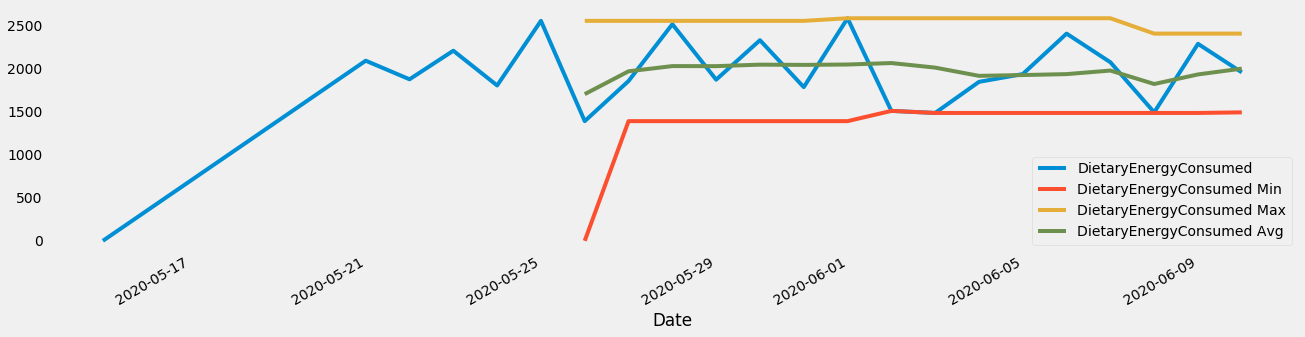

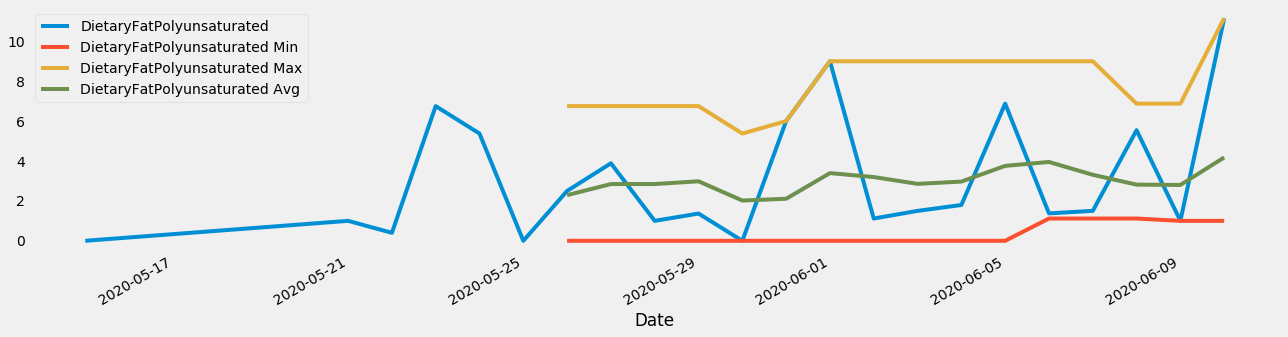

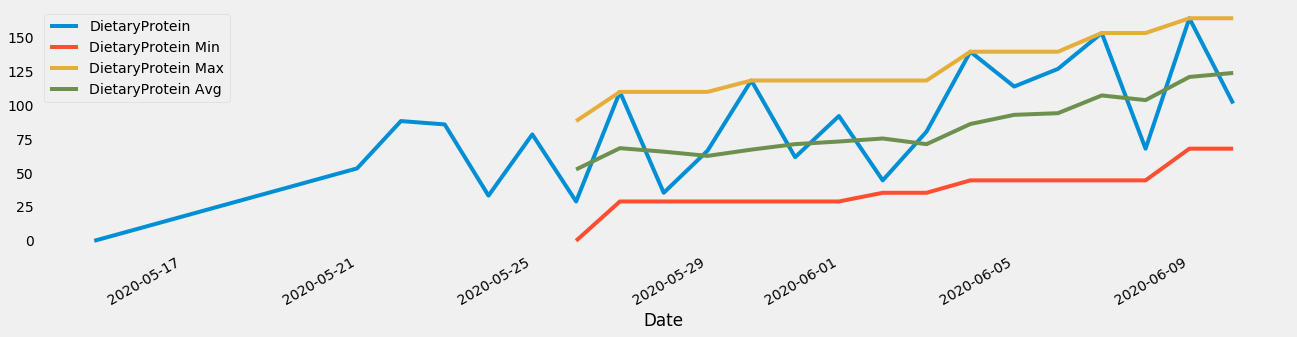

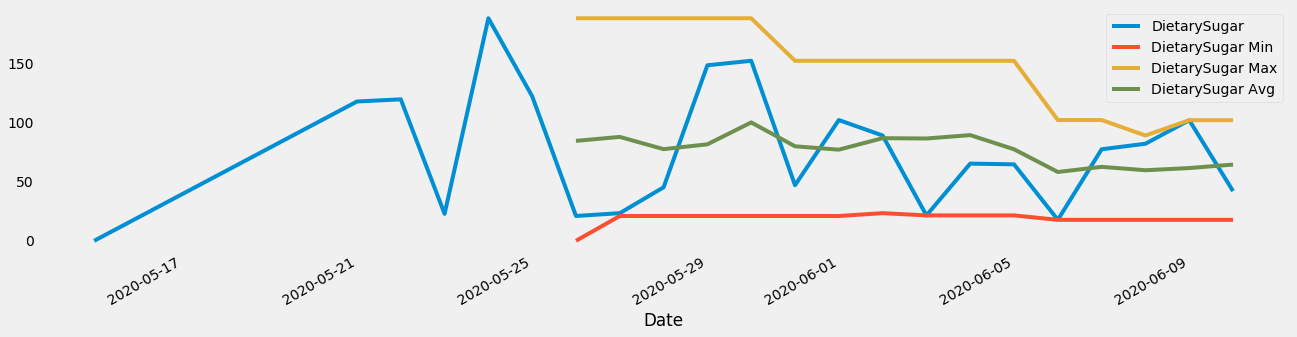

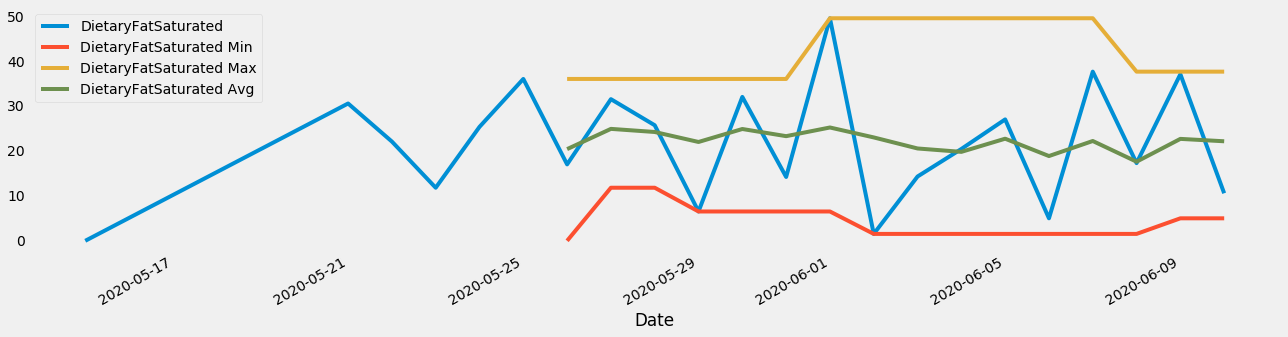

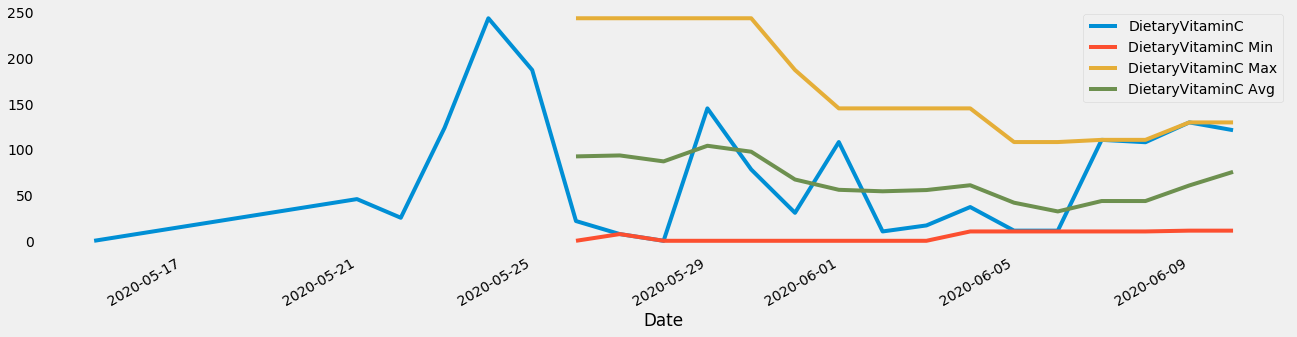

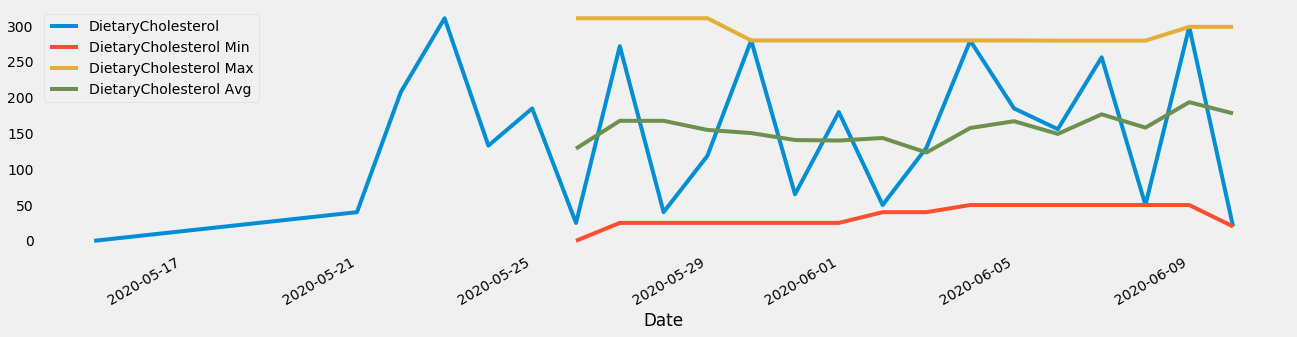

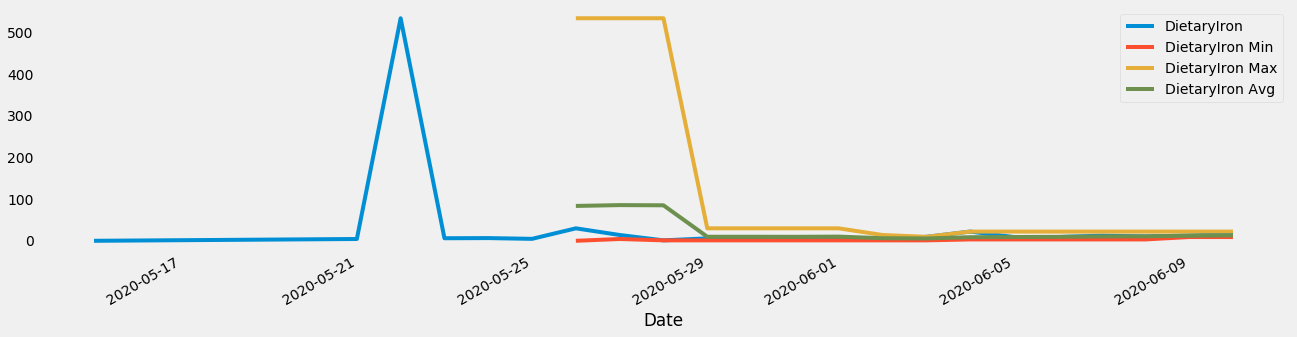

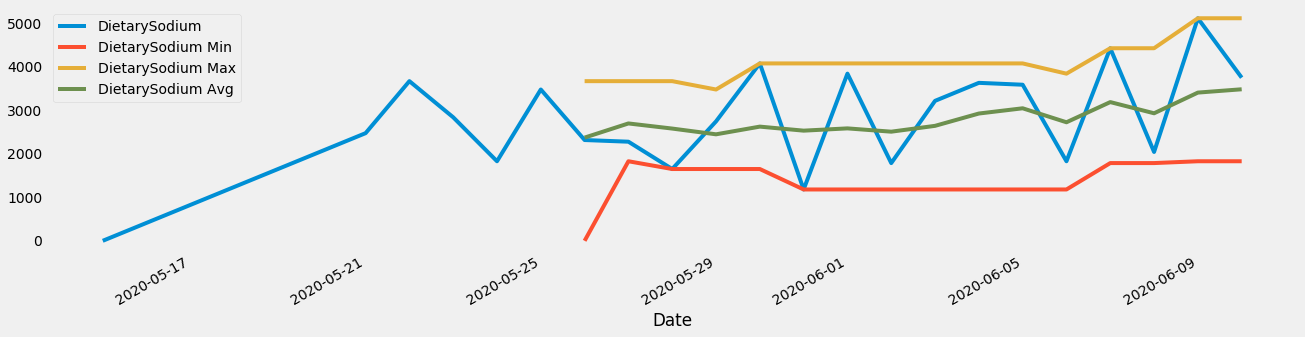

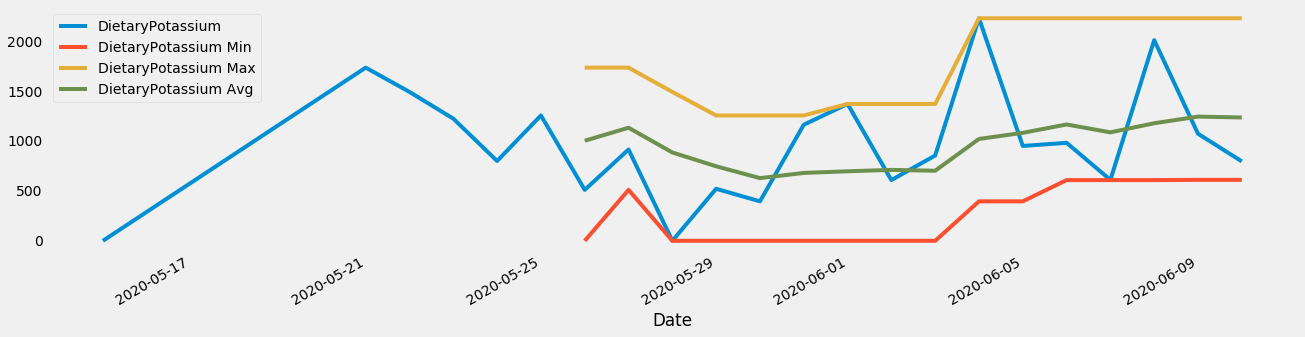

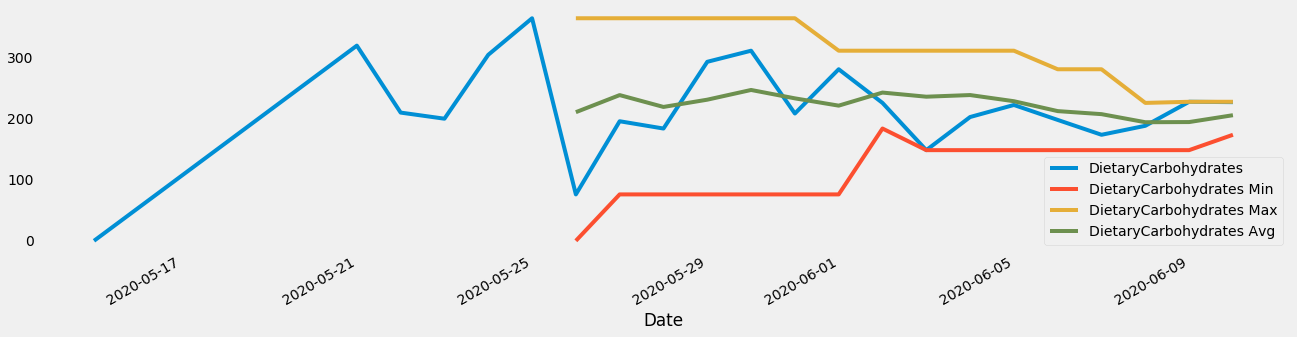

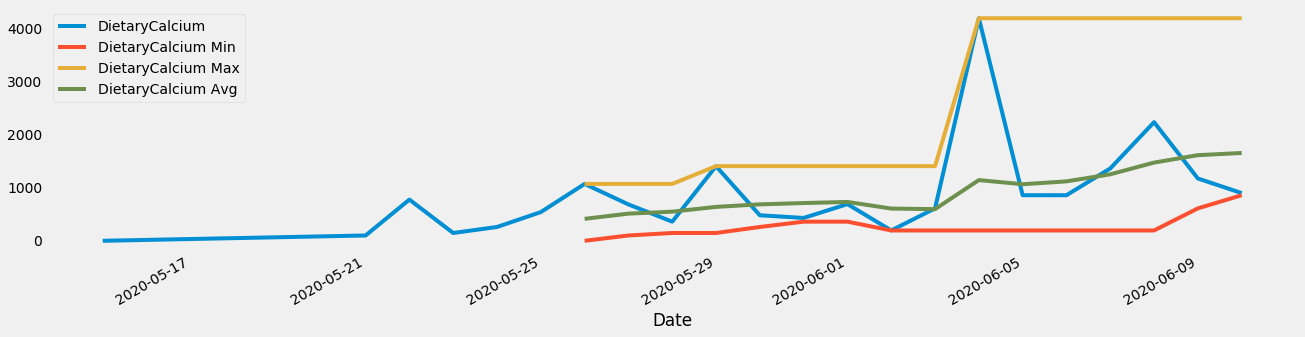

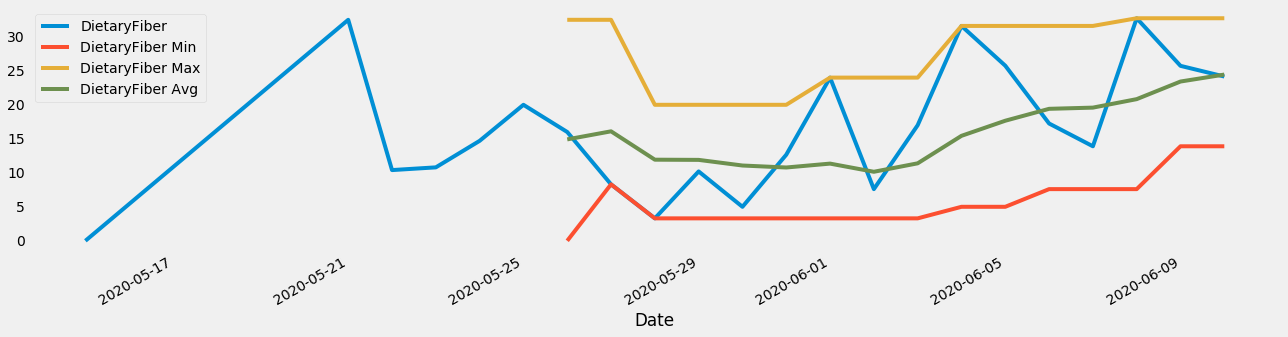

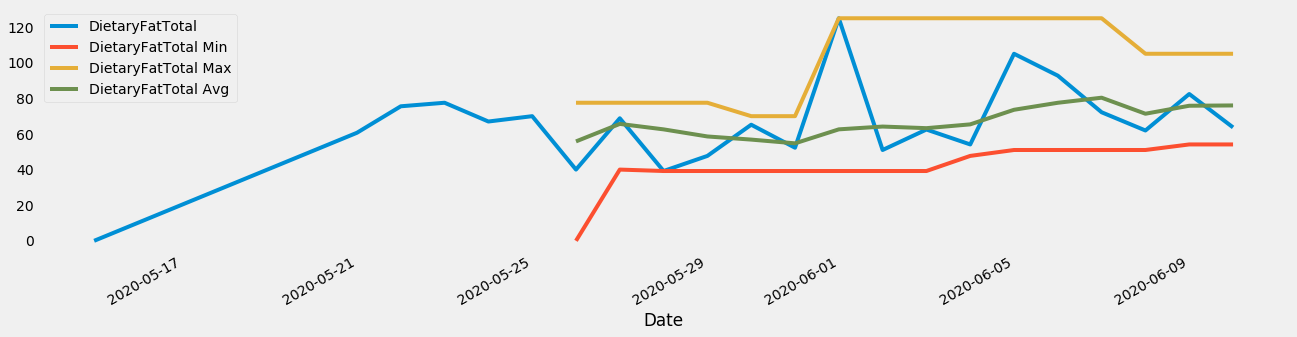

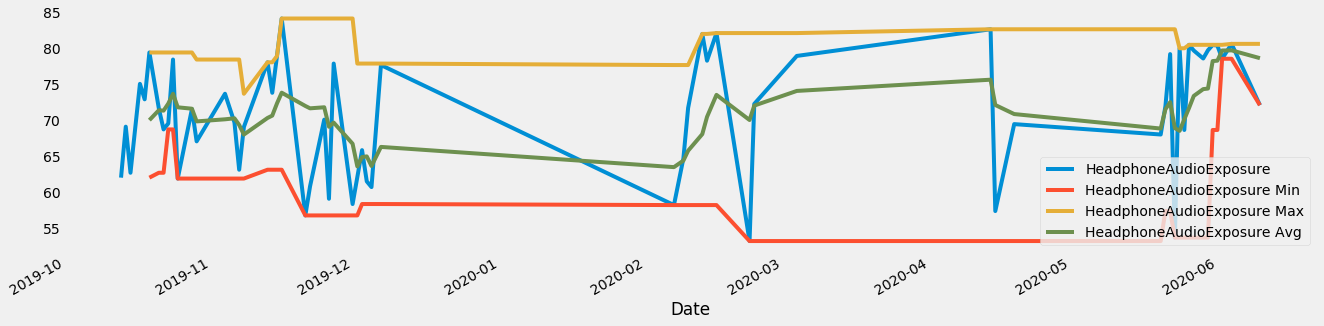

In [90]:
appended_health_data = []
for i in list: 
    lookup = i
    df = fitness[fitness['type'] == lookup]
    df = df.astype({"value":'float'})
    if i == 'BodyMass':
        df_agg = df.groupby('Date')['value'].max().to_frame().reset_index().rename(columns={'value':lookup})
        print('max')
    elif i == 'HeadphoneAudioExposure':
        df_agg = df.groupby('Date')['value'].mean().to_frame().reset_index().rename(columns={'value':lookup})
        print('mean')
    else:
        df_agg = df.groupby('Date')['value'].sum().to_frame().reset_index().rename(columns={'value':lookup})
        print('sum')
    df_agg[lookup+' Min'] = df_agg[lookup].rolling(fitness_rolling_agg).min()
    df_agg[lookup+' Max'] = df_agg[lookup].rolling(fitness_rolling_agg).max()
    df_agg[lookup+' Avg'] = df_agg[lookup].rolling(fitness_rolling_agg).mean()
    appended_health_data.append(df_agg)
    print(i + ' Aggregated and Graphed and Appended')
    df_agg.plot(kind='line',
             x='Date',
             y=[lookup,lookup+' Min',lookup+' Max',lookup+' Avg'],
             secondary_y=['$$$'],
             figsize=(20,5))
appended_health_data = pd.concat(appended_health_data)
    

In [111]:
health_data_long = appended_health_data.rename_axis("type", axis="columns").set_index('Date').stack().to_frame().dropna().reset_index().rename(columns={0: 'value'})
health_data = health_data_long.pivot_table(index=['Date'], columns='type', values='value').reset_index().rename(columns={0: 'value'})
recent_health_data = health_data[health_data['Date'] > '2020-05-20'].reset_index().drop(columns='index')
recent_health_data 

type,Date,BodyMass,BodyMass Avg,BodyMass Max,BodyMass Min,DietaryCalcium,DietaryCalcium Avg,DietaryCalcium Max,DietaryCalcium Min,DietaryCarbohydrates,...,FlightsClimbed Max,FlightsClimbed Min,HeadphoneAudioExposure,HeadphoneAudioExposure Avg,HeadphoneAudioExposure Max,HeadphoneAudioExposure Min,StepCount,StepCount Avg,StepCount Max,StepCount Min
0,2020-05-21,249.6,NaN,NaN,NaN,100.00,NaN,NaN,NaN,319.7100,...,11.0,1.0,71.915433,71.478805,82.626475,57.297778,11892.0,4467.857143,11892.0,859.0
1,2020-05-22,250.0,NaN,NaN,NaN,775.00,NaN,NaN,NaN,210.0250,...,11.0,1.0,79.166656,72.470334,82.626475,57.297778,15562.0,6548.857143,15562.0,859.0
2,2020-05-23,246.5,NaN,NaN,NaN,147.00,NaN,NaN,NaN,200.0100,...,11.0,3.0,53.597125,68.854000,82.626475,53.597125,11940.0,8017.571429,15562.0,859.0
3,2020-05-24,246.5,NaN,NaN,NaN,260.00,NaN,NaN,NaN,304.6644,...,11.0,3.0,79.977537,68.475580,79.977537,53.597125,11591.0,8926.285714,15562.0,859.0
4,2020-05-25,245.1,NaN,NaN,NaN,540.00,NaN,NaN,NaN,364.5624,...,11.0,3.0,68.594659,70.089420,79.977537,53.597125,12324.0,10509.571429,15562.0,859.0
5,2020-05-26,245.9,247.900000,251.7,245.1,1070.00,413.142857,1070.0,0.0,76.0000,...,11.0,2.0,80.459175,71.667717,80.459175,53.597125,5698.0,11200.857143,15562.0,5698.0
6,2020-05-27,244.0,246.800000,250.0,244.0,684.50,510.928571,1070.0,100.0,195.8440,...,7.0,2.0,79.662780,73.339052,80.459175,53.597125,8093.0,11014.285714,15562.0,5698.0
7,2020-05-28,245.5,246.214286,250.0,244.0,360.00,548.071429,1070.0,147.0,183.9000,...,7.0,1.0,NaN,NaN,NaN,NaN,903.0,9444.428571,15562.0,903.0
8,2020-05-29,245.5,245.571429,246.5,244.0,1404.50,638.000000,1404.5,147.0,293.2165,...,6.0,1.0,78.554407,74.287477,80.459175,53.597125,17660.0,9744.142857,17660.0,903.0
9,2020-05-30,245.7,245.457143,246.5,244.0,480.00,685.571429,1404.5,260.0,311.4000,...,6.0,1.0,79.699360,74.363578,80.459175,53.597125,22390.0,11237.000000,22390.0,903.0


In [112]:
df = recent_health_data[recent_health_data.columns.drop(list(recent_health_data.filter(regex='HeadphoneAudioExposure')))]

TypeError: 'list' object is not callable

In [116]:
recent_health_data.filter(regex='HeadphoneAudioExposure')

type,HeadphoneAudioExposure,HeadphoneAudioExposure Avg,HeadphoneAudioExposure Max,HeadphoneAudioExposure Min
0,71.915433,71.478805,82.626475,57.297778
1,79.166656,72.470334,82.626475,57.297778
2,53.597125,68.854000,82.626475,53.597125
3,79.977537,68.475580,79.977537,53.597125
4,68.594659,70.089420,79.977537,53.597125
5,80.459175,71.667717,80.459175,53.597125
6,79.662780,73.339052,80.459175,53.597125
7,NaN,NaN,NaN,NaN
8,78.554407,74.287477,80.459175,53.597125
9,79.699360,74.363578,80.459175,53.597125
